# The dataset contains 50,000 entries with six columns describing **housing prices**. Below is a brief overview:
<img src="ex1.png" alt="Image Description" width="500">

## Columns:

-    **SquareFeet**: The size of the house in square feet (integer).
-    **Bedrooms**: The number of bedrooms in the house (integer).
-    **Bathrooms**: The number of bathrooms in the house (integer).
-    **Neighborhood**: The type of neighborhood (categorical: "Rural," "Suburb," or "Urban").
-    **YearBuilt**: The year the house was constructed (integer).
-    **Price**: The house's price in USD (float).

# ________________________________________________________________________________________________________________________________________________________________________________

## important library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2
import math
from scipy import stats


#           **Part 1: Descriptive Statistics**

## import data
- take head(5) to show data

In [2]:
df = pd.read_csv('housing_price.csv')

df.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


## information about data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


## The result
- The dataset is clean and complete, with 50,000 entries and no missing values across six columns. Data types are appropriate for analysis, with numerical and categorical columns correctly represented.

# ________________________________________________________________________________________________________________________________________________________________________________

## check data 
- duplicated
- negative value in price !!

## 1- duplicated

In [4]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

#data.duplicated().any()


0

## 2- negative value in price !!
### show it

In [5]:
negative_prices = df[df['Price'] < 0]['Price']

print(negative_prices)

1266    -24715.242482
2310     -7550.504574
3630    -19871.251146
4162    -10608.359522
5118    -23911.003119
5951     -4537.418615
6355    -13803.684059
8720    -24183.000515
9611    -13692.026068
10597     -434.097124
11991    -4910.415323
17442    -8238.884499
17706   -28774.998022
20211   -18159.685676
20759    -4810.724320
23650    -4295.932176
25459    -7177.628532
29827     -847.895073
30171     -602.209099
33666   -36588.165397
35553    -4771.570194
36929    -6159.039213
Name: Price, dtype: float64


## remove it

In [6]:
df = df[df['Price'] >= 0]

print(df['Price'].min())

154.77912007166017


## The result
- There are no duplicates in the data
- no negative value in col price

# ________________________________________________________________________________________________________________________________________________________________________________

## sample data

In [7]:
df.sample(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
23636,1457,2,2,Rural,1992,144047.107037
24584,2607,5,2,Suburb,1990,291038.214068
25071,1109,4,3,Suburb,1951,185600.231499
8211,2049,4,1,Suburb,1961,253997.923124
20935,2040,4,1,Urban,2011,239694.352977
10756,2260,2,3,Rural,2003,316437.093982
46096,2875,5,3,Urban,1978,356571.490520
28349,1767,4,2,Suburb,2001,224619.148485
6518,2599,3,1,Suburb,2004,249253.565942
14508,2716,3,2,Rural,2020,361452.907053


# ________________________________________________________________________________________________________________________________________________________________________________

## describe for all data

In [8]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000
mean,2006.752551,3.498659,1.995458,1985.404338,224931.667960
std,575.350298,1.116325,0.815859,20.718407,75995.682992
min,1000.000000,2.000000,1.000000,1950.000000,154.779120
25%,1514.000000,3.000000,1.000000,1967.000000,170007.487130
50%,2008.000000,3.000000,2.000000,1985.000000,225100.123857
75%,2506.000000,4.000000,3.000000,2003.000000,279395.826288
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


# ________________________________________________________________________________________________________________________________________________________________________________

## Get the mean, mode, median, variance and standard deviation for at least 3 columns.
- Square Feet
- Year Built
- Price

## 1- Square Feet

In [9]:
mean_SquareFeet = df['SquareFeet'].mean()
mode_SquareFeet = df['SquareFeet'].mode()
median_SquareFeet = df['SquareFeet'].median()
variance_SquareFeet = df['SquareFeet'].var()
standard_deviation_SquareFeet = df['SquareFeet'].std()

print(f"The mode value of Square Feet is: {mode_SquareFeet}")
print("\n")

print(f"The mean value of Square Feet is: {mean_SquareFeet}")

print(f"The median value of Square Feet is: {median_SquareFeet}")

print(f"The variance value of Square Feet is: {variance_SquareFeet }")

print(f"The standard deviation value of Square Feet is: {standard_deviation_SquareFeet}")





The mode value of Square Feet is: 0    2486
Name: SquareFeet, dtype: int64


The mean value of Square Feet is: 2006.752551122494
The median value of Square Feet is: 2008.0
The variance value of Square Feet is: 331027.9656401891
The standard deviation value of Square Feet is: 575.3502982011821


# 2- Year Built

In [10]:
mean_YearBuilt = df['YearBuilt'].mean()
mode_YearBuilt = df['YearBuilt'].mode()
median_YearBuilt = df['YearBuilt'].median()
variance_YearBuilt= df['YearBuilt'].var()
standard_deviation_YearBuilt = df['YearBuilt'].std()

print(f"The mode value of Year Built is: {mode_YearBuilt}")
print("\n")

print(f"The mean value of Year Built is: {mean_YearBuilt}")

print(f"The median value of Year Built is: {median_YearBuilt}")

print(f"The variance value of Year Built is: {variance_YearBuilt }")

print(f"The standard deviation value of Year Built is: {standard_deviation_YearBuilt}")





The mode value of Year Built is: 0    1968
Name: YearBuilt, dtype: int64


The mean value of Year Built is: 1985.4043379086797
The median value of Year Built is: 1985.0
The variance value of Year Built is: 429.25239889431936
The standard deviation value of Year Built is: 20.718407248008216


# 3- Price

In [11]:
mean_Price = df['Price'].mean()
mode_Price = df['Price'].mode()
median_Price = df['Price'].median()
variance_Price = df['Price'].var()
standard_deviation_Price = df['Price'].std()

print(f"The mode value of Price is: {mode_Price}")
print("\n")

print(f"The mean value of Price is: {mean_Price}")

print(f"The median value of Price is: {median_Price}")

print(f"The variance value of Price is: {variance_Price}")

print(f"The standard deviation value of Price is: {standard_deviation_Price}")


The mode value of Price is: 0           154.779120
1           276.063516
2          2360.274450
3          2697.849758
4          3000.859614
             ...      
49973    468493.877841
49974    470989.679074
49975    476671.733263
49976    482577.163405
49977    492195.259972
Name: Price, Length: 49978, dtype: float64


The mean value of Price is: 224931.66795958765
The median value of Price is: 225100.1238574357
The variance value of Price is: 5775343833.395425
The standard deviation value of Price is: 75995.68299183463


# ________________________________________________________________________________________________________________________________________________________________________________

### For any numerical column, construct a histogram for it
- price

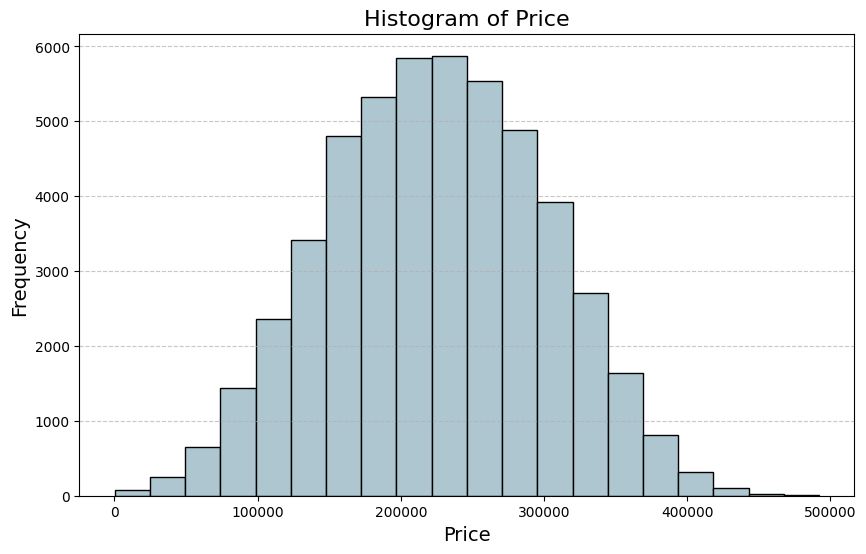

In [12]:
plt.figure(figsize=(10, 6))

plt.hist(df['Price'], bins=20, edgecolor='black' , color= "#AEC6CF")

plt.title('Histogram of Price', fontsize=16)

plt.xlabel('Price', fontsize=14)

plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# ________________________________________________________________________________________________________________________________________________________________________________

### For any column, compute the frequency distribution using value_counts() function
- Neighbor hood

In [13]:
frequency_distribution = df['Neighborhood'].value_counts()

print(frequency_distribution)


Neighborhood
Suburb    16716
Rural     16668
Urban     16594
Name: count, dtype: int64


# ________________________________________________________________________________________________________________________________________________________________________________

# Plot bar and pie chart for the previous column
### The column was selected from the previous cell   **[frequency_distribution = df['Neighborhood'].value_counts()]**
- Neighbor hood

## bar chart

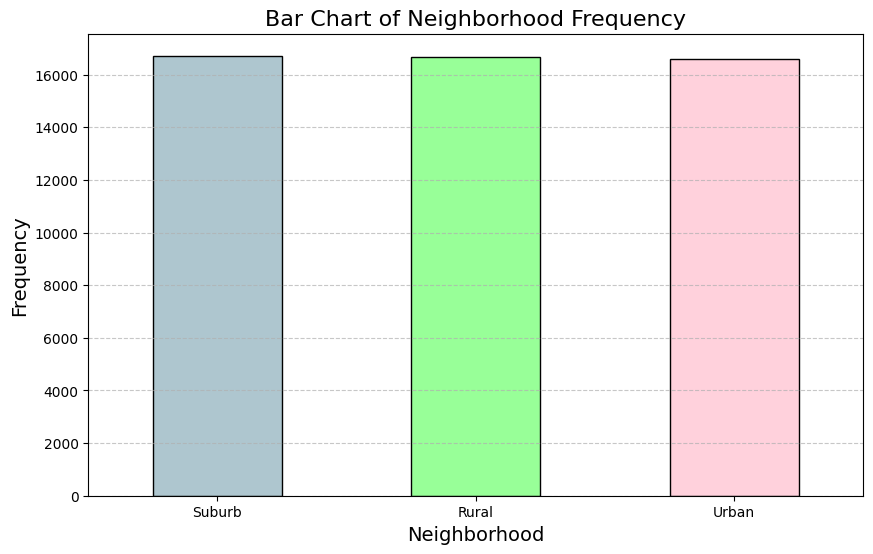

In [14]:
colors = ['#AEC6CF', '#98FF98', '#FFD1DC']

plt.figure(figsize=(10, 6))

frequency_distribution.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Bar Chart of Neighborhood Frequency', fontsize=16)

plt.xlabel('Neighborhood', fontsize=14)

plt.ylabel('Frequency', fontsize=14)

plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## pie cahrt

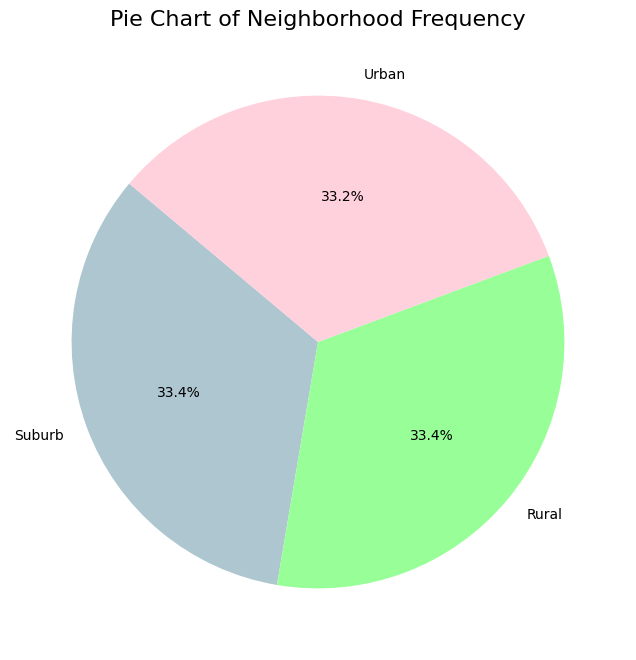

In [15]:
plt.figure(figsize=(8, 8))

frequency_distribution.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Pie Chart of Neighborhood Frequency', fontsize=16)

plt.ylabel('')  

plt.show()


# ________________________________________________________________________________________________________________________________________________________________________________

## For at least 3 columns, plot box plot.
- Square Feet
- Year Built
- Price

# 1- Square Feet
## The box plot for Square Feet shows:

-    Minimum: ~1000 sqft (bottom whisker).
-    Maximum: ~3000 sqft (top whisker).
-    Median (Q2): ~2000 sqft (green line).
-    IQR (Q1 to Q3): ~1500 to ~2500 sqft (box edges).
-    Outliers: None or very few points outside whiskers.


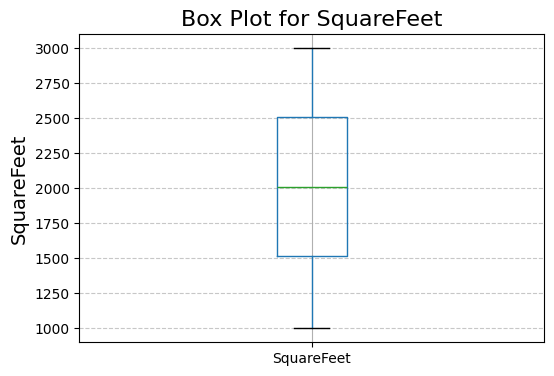

In [16]:
plt.figure(figsize=(6, 4))

df.boxplot(column=['SquareFeet'])

plt.title('Box Plot for SquareFeet', fontsize=16)

plt.ylabel('SquareFeet', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 2- Year Built
## The box plot for Year Built shows:

-    Minimum: ~1950 (bottom whisker).
-    Maximum: ~2020 (top whisker).
-    Median (Q2): ~1985 (green line).
-    IQR (Q1 to Q3): ~1970 to ~2000 (box edges).
-    Outliers: None or very few points.

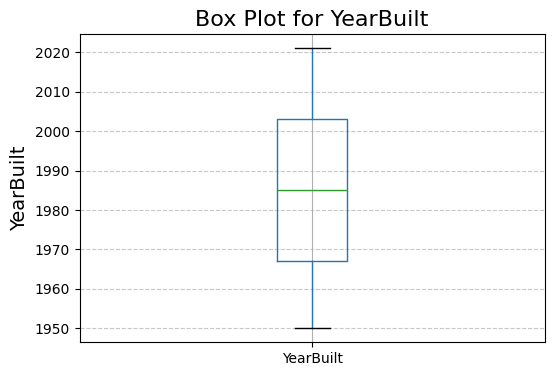

In [17]:
plt.figure(figsize=(6, 4))

df.boxplot(column=['YearBuilt'])

plt.title('Box Plot for YearBuilt', fontsize=16)

plt.ylabel('YearBuilt', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 3- Price
## The box plot for Price shows:

-    Minimum: ~0 (bottom whisker).
-    Maximum: ~500,000 (top whisker).
-    Median (Q2): ~200,000 (green line).
-    IQR (Q1 to Q3): ~150,000 to ~250,000 (box edges).
-    Outliers: Several points above ~500,000 and none below ~0.


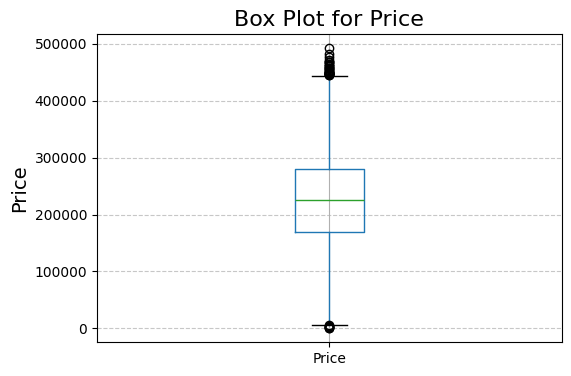

In [18]:
plt.figure(figsize=(6, 4))

df.boxplot(column=['Price'])

plt.title('Box Plot for Price', fontsize=16)

plt.ylabel('Price', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# ________________________________________________________________________________________________________________________________________________________________________________

## Construct a heatmap for your dataset.
- Strong Positive Correlation:

   - SquareFeet and Price (0.75): Larger properties generally have higher prices.

- Weak Correlations:

   - Bedrooms, Bathrooms, and YearBuilt show weak correlations with Price (< 0.1), indicating minimal direct influence.

- Independent Variables:

   - Most features have low correlations with each other, suggesting minimal multicollinearity in the dataset.

- Significance:

   - SquareFeet is the most significant predictor of Price among the variables.

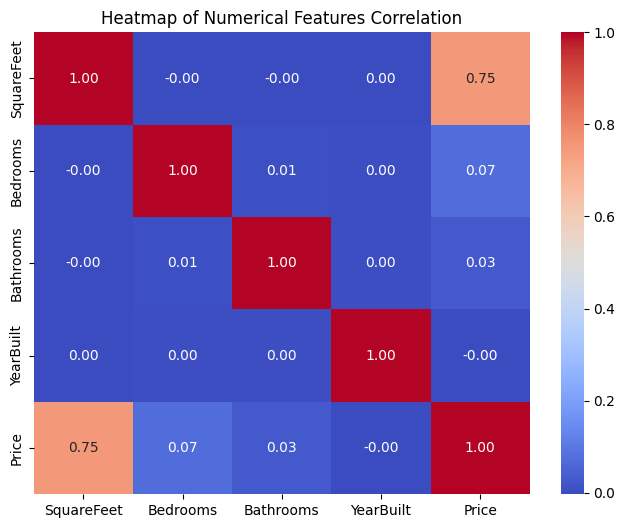

In [19]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Heatmap of Numerical Features Correlation")

plt.show()



# ________________________________________________________________________________________________________________________________________________________________________________

### For any 2 columns, calculate both Spearman and Pearson correlation coefficient.
- Square Feet
- Price

# Pearson correlation
### Pearson Correlation (0.75):

- **Strong positive linear relationship** between SquareFeet and Price.
- As size increases, price increases in a consistent manner.

In [20]:
column1 = 'SquareFeet'  
column2 = 'Price'       

pearson_corr = numerical_data[column1].corr(numerical_data[column2], method='pearson')

print(f"Pearson Correlation between {column1} and {column2}: {pearson_corr}")


Pearson Correlation between SquareFeet and Price: 0.750655727858554


# Spearman correlation
### Spearman Correlation (0.76):

- **Strong positive monotonic relationship** between SquareFeet and Price.
- Price increases as size increases, regardless of linearity.

In [21]:
spearman_corr = numerical_data[column1].corr(numerical_data[column2], method='spearman')

print(f"Spearman Correlation between {column1} and {column2}: {spearman_corr}")


Spearman Correlation between SquareFeet and Price: 0.7595796575578705


# ________________________________________________________________________________________________________________________________________________________________________________

# **Part 2: Inferential Statistics**

## Sample your dataset to be of size = 100

In [22]:
sample = df.sample(n = 100  , random_state= 100) 
sample.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
21450,2713,5,2,Suburb,2004,215070.921006
39630,2714,4,1,Rural,1959,433777.248551
16759,1241,5,1,Urban,1993,107551.215767
16273,2117,3,3,Rural,2001,252767.898688
16786,2860,2,2,Urban,1988,375957.330501


# ________________________________________________________________________________________________________________________________________________________________________________

# Calculate the 95% confidence interval of the population mean of any column.
- price

<img src="ex2.png" alt="Image Description" width="500">

In [23]:
sample_price= sample['Price']

sample_mean_price = np.mean(sample_price)

standard_deviation_Price = df['Price'].std()

confidence_coefficient = 0.95  
confidence_level = 1 - confidence_coefficient

mean_price = df["Price"].mean()

z_test, p_value = ztest(sample['Price'], value= mean_price)

print(f"Z-statistic: {z_test}")
print(f"P-value: {p_value}")

margin_of_error_of = z_test * (standard_deviation_Price / np.sqrt(100))  


lower_bound = sample_mean_price - margin_of_error_of
upper_bound = sample_mean_price + margin_of_error_of


print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"( {lower_bound} ≤ 𝝁 ≤ {upper_bound} ) = 95 % = 0.95")


Z-statistic: 0.05746616065789384
P-value: 0.9541738614277387
Lower Bound: 224983.91316055562
Upper Bound: 225857.34918617862
( 224983.91316055562 ≤ 𝝁 ≤ 225857.34918617862 ) = 95 % = 0.95


# ________________________________________________________________________________________________________________________________________________________________________________

## Perform a hypothesis testing on the mean and variance value for any column.
- price

# 1- mean

<img src="ex3.png" alt="Image Description" width="500">

## Steps:

-    Calculate the sample mean and standard deviation.
-    Perform a z-test to test whether the sample mean is significantly different from the hypothesized population mean (250,000).
-    Compare the p-value with the significance levelto make a decision.
## Hypothesis:

-  **(H₀)**: The mean price of properties is equal to 250,000 (µ₀ = 250,000).
-  **(H₁)**: The mean price of properties is not equal to 250,000 (µ ≠ 250,000).
-  We will use a two-tailed test with a significance level of 0.05 (α = 0.05).

In [24]:
mean_price = df["Price"].mean()

z_test, p_value = ztest(sample['Price'], value= mean_price)

print(f"Z-statistic: {z_test}")
print(f"P-value: {p_value}")

#confidence_coefficient = 95 %
confidence_level = 0.05

if p_value < confidence_level:
    print("Reject the null hypothesis: The mean price is not equal to 250,000.")
    
else:
    print("Fail to reject the null hypothesis: The mean price is equal to 250,000.")


Z-statistic: 0.05746616065789384
P-value: 0.9541738614277387
Fail to reject the null hypothesis: The mean price is equal to 250,000.


# 2- variance 
<img src="ex4.png" alt="Image Description" width="500">


## Hypotheses:

-    **Null hypothesis**: H0:σ2 = σ02​ (The population variance is equal to the hypothesized value).
-    **Alternative hypothesis**: Ha:σ2 ≠ σ02​ (The population variance is different from the hypothesized value).

In [25]:
#confidence_coefficient = 95 %
confidence_level = 0.05


sample_variance = sample['Price'].var()
sample_size = 100

population_variance = df["Price"].var()  

test_statistic = (sample_size - 1) * sample_variance / population_variance

critical_value_upper = chi2.ppf(1 - confidence_level / 2, df=sample_size - 1)
critical_valuel_lower = chi2.ppf(confidence_level / 2, df=sample_size - 1)


print(f"test_statistic: {test_statistic}")
print(f"Critical value (upper): {critical_value_upper}")
print(f"Critical value (lower): {critical_valuel_lower}")


if test_statistic < critical_value_upper or test_statistic > critical_valuel_lower:
    print("Fail to reject the null hypothesis: The variance is equal to the hypothesized variance.")
    
else:
    print("Reject the null hypothesis: The variance is different from the hypothesized variance.")


test_statistic: 124.10387966410327
Critical value (upper): 128.4219886438403
Critical value (lower): 73.36108019128368
Fail to reject the null hypothesis: The variance is equal to the hypothesized variance.


# ________________________________________________________________________________________________________________________________________________________________________________

## Perform a hypothesis testing on the population mean for 2 columns
### independent 
- Square Feet 
- Price 

<img src="ex5.png" alt="Image Description" width="500">

## Hypotheses:

-   **(H₀)**: The population mean of Price or SquareFeet is equal.
-   **(H₁)**: The population mean of Price or SquareFeet is different.

In [26]:
price_data = sample['Price']
sqft_data = sample['SquareFeet']


sample_mean_price = price_data.mean()
sample_mean_sqft = sqft_data.mean()


std_price = sample["Price"].std()
std_sqft = sample["SquareFeet"].std()


n_price = 100
n_sqft =  100


z_test_statistic = (sample_mean_price - sample_mean_sqft) / math.sqrt((std_price**2 / n_price) + (std_sqft**2 / n_sqft))

z_stat, p_value = ztest(sample['Price'], sample['SquareFeet'])
 
print(f"Z-statistic: {z_test_statistic}")
print(f"P-value: {p_value}")

#confidence_coefficient = 95 %
confidence_level = 0.05


if p_value < confidence_level:
    print("Reject the null hypothesis: The means are different.")
else:
    print("Fail to reject the null hypothesis: The means are equal.")


Z-statistic: 26.25879169122863
P-value: 5.672479545235619e-152
Reject the null hypothesis: The means are different.


# ________________________________________________________________________________________________________________________________________________________________________________

## Perform a hypothesis testing on the population mean for more than 2 columns.
- using anova by scipy

In [27]:
columns_to_test = ['Price', 'SquareFeet', 'Bedrooms']  

column_data = [sample[column] for column in columns_to_test]

f_statistic, p_value = stats.f_oneway(*column_data)       # -> * for unpacking

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

#confidence_coefficient = 95 %
confidence_level = 0.05


if p_value < confidence_level:
    print("Reject the null hypothesis: The means are not equal.")
else:
    print("Fail to reject the null hypothesis: The means are equal.")



F-statistic: 695.6964935664955
P-value: 8.40450405990934e-113
Reject the null hypothesis: The means are not equal.


# ________________________________________________________________________________________________________________________________________________________________________________

## Sample your dataset to be of size = 20

In [28]:
sample2 = df.sample(n = 20  , random_state= 100) 
sample2.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
21450,2713,5,2,Suburb,2004,215070.921006
39630,2714,4,1,Rural,1959,433777.248551
16759,1241,5,1,Urban,1993,107551.215767
16273,2117,3,3,Rural,2001,252767.898688
16786,2860,2,2,Urban,1988,375957.330501


# ________________________________________________________________________________________________________________________________________________________________________________

# Calculate the 95% confidence interval of the population mean of any column.

In [29]:
sample_price= sample2['Price']

sample_mean_price = np.mean(sample_price)

standard_deviation_Price = df['Price'].std()

confidence_coefficient = 0.95  
confidence_level = 1 - confidence_coefficient

z_test, p_value = ztest(sample['Price'], value= mean_price)

margin_of_error_of = z_test * (standard_deviation_Price / np.sqrt(20)) 


lower_bound = sample_mean_price - margin_of_error_of
upper_bound = sample_mean_price + margin_of_error_of


print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"( {lower_bound} ≤ 𝝁 ≤ {upper_bound} ) = 95 % = 0.95")


Lower Bound: 247269.48380942698
Upper Bound: 249222.54613671734
( 247269.48380942698 ≤ 𝝁 ≤ 249222.54613671734 ) = 95 % = 0.95


# ________________________________________________________________________________________________________________________________________________________________________________

## Perform a hypothesis testing on the mean  value for any column.
- price


## Hypothesis:

-  **(H₀)**: The mean price of properties is equal to 250,000 (µ₀ = 250,000).
-  **(H₁)**: The mean price of properties is not equal to 250,000 (µ ≠ 250,000).
-  We will use a two-tailed test with a significance level of 0.05 (α = 0.05).

In [30]:
mean_price = df["Price"].mean()

z_test, p_value = ztest(sample2['Price'], value=mean_price)

print(f"Z-statistic: {z_test}")
print(f"P-value: {p_value}")

#confidence_coefficient = 95 %
confidence_level = 0.05

if p_value < confidence_level:
    print("Reject the null hypothesis: The mean price is not equal to 250,000.")
    
else:
    print("Fail to reject the null hypothesis: The mean price is equal to 250,000.")


Z-statistic: 1.1302352012074248
P-value: 0.25837713065766965
Fail to reject the null hypothesis: The mean price is equal to 250,000.


# ________________________________________________________________________________________________________________________________________________________________________________

## Perform a hypothesis testing on the  variance value for any column.
- price

## Hypotheses:

-    **Null hypothesis**: H0:σ2 = σ02​ (The population variance is equal to the hypothesized value).
-    **Alternative hypothesis**: Ha:σ2 ≠ σ02​ (The population variance is different from the hypothesized value).

In [31]:
#confidence_coefficient = 95 %
confidence_level = 0.05


sample_variance = sample2['Price'].var()
sample_size = 20

population_variance = df["Price"].var()  

test_statistic = (sample_size - 1) * sample_variance / population_variance

critical_value_upper = chi2.ppf(1 - confidence_level / 2, df=sample_size - 1)
critical_valuel_lower = chi2.ppf(confidence_level / 2, df=sample_size - 1)


print(f"Chi-square statistic: {test_statistic}")
print(f"Critical value (upper): {critical_value_upper}")
print(f"Critical value (lower): {critical_valuel_lower}")


if test_statistic < critical_value_upper or test_statistic > critical_valuel_lower:
    print("Fail to reject the null hypothesis: The variance is equal to the hypothesized variance.")
    
else:
    print("Reject the null hypothesis: The variance is different from the hypothesized variance.")


Chi-square statistic: 27.997200382883133
Critical value (upper): 32.85232686172969
Critical value (lower): 8.906516481987971
Fail to reject the null hypothesis: The variance is equal to the hypothesized variance.


# ________________________________________________________________________________________________________________________________________________________________________________

# **part 3 documentation**

 ## <a href="C:\Users\dell\Desktop\project stat\221002374_omar_khaled.pdf" target="_blank">Click here to open report</a>
